In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
voice_data=pd.read_csv('voice.csv')

In [3]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [4]:
voice_data.shape

(3168, 21)

In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
voice_data['label']=LE.fit_transform(voice_data['label'])

In [6]:
voice_data['label'].sample(10)

1186    1
97      1
2425    0
2137    0
518     1
2365    0
1649    0
121     1
1577    1
1790    0
Name: label, dtype: int64

In [7]:
features=voice_data.drop('label',axis=1)

In [8]:
target=voice_data['label']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [10]:
x_train.shape

(2534, 20)

In [40]:
from sklearn.metrics import confusion_matrix
lg_model=LogisticRegression(penalty='l1',solver='liblinear')
lg_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred=lg_model.predict(x_test)

In [42]:
confusion_matrix(y_test,y_pred)

array([[289,  13],
       [  5, 327]])

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [44]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [45]:
print(acc,pre,rec)

0.9716088328075709 0.961764705882353 0.9849397590361446


In [46]:
from yellowbrick.target import FeatureCorrelation
feature_names=list(features.columns)

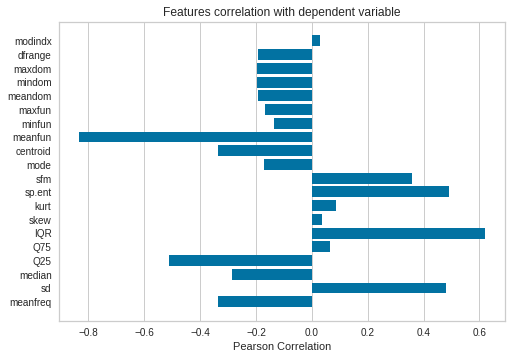

In [49]:
visualizer=FeatureCorrelation(labels=feature_names)
visualizer.fit(features,target)
visualizer.poof()

In [50]:
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,SelectKBest

In [85]:
#univariate=SelectKBest(chi2,k=4).fit(features,target)
univariate=SelectKBest(f_classif,k=4).fit(features,target)

In [86]:
feature_mask=univariate.get_support()
selected_columns=features.columns[feature_mask]
selected_columns

Index(['Q25', 'IQR', 'sp.ent', 'meanfun'], dtype='object')

In [87]:
selected_features=features[selected_columns]
selected_features.head()

,Q25,IQR,sp.ent,meanfun
0,0.015071,0.075122,0.893369,0.084279
1,0.019414,0.073252,0.892193,0.107937
2,0.008701,0.123207,0.846389,0.098706
3,0.096582,0.111374,0.963322,0.088965
4,0.078720,0.127325,0.971955,0.106398


In [81]:
x_train,x_test,y_train,y_test=train_test_split(selected_features,target,test_size=0.2)

In [88]:
sel_lg_model=LogisticRegression(penalty='l2',solver='liblinear')
sel_lg_model.fit(x_train,y_train)
y_pred=sel_lg_model.predict(x_test)

In [89]:
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

print(acc,pre,rec)

0.9037854889589906 0.8532608695652174 0.9781931464174455
